<a href="https://colab.research.google.com/github/ameyaoka/micrograd-implementation/blob/main/micrograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Micrograd

In [99]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [100]:
def f(x):
  return 3*x**2 -4*x + 5

In [101]:
f(3.0)

20.0

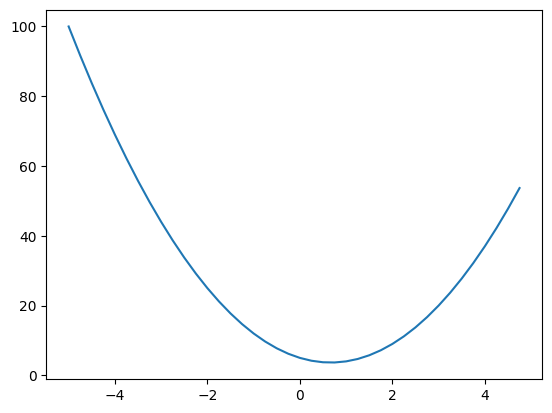

In [102]:
xs = np.arange(-5,5,0.25)
ys=  f(xs)
plt.plot(xs,ys)

- **Slope**

In [103]:
h = 0.00001
x= 3.0
(f(x+h) - f(x))/h

14.00003000000538

In [104]:

h = 0.00001
x= -3.0
(f(x+h) - f(x))/h

-21.999970000052823

In [105]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)



4.0


 - **derivative with respect to a**

In [106]:
h = 0.0001


a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h         # a = a+h
d2 = a*b + c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)



d1 4.0
d2 3.999699999999999
slope -3.000000000010772


- **Derivative with repect to b**

In [107]:
h = 0.0001


a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h         # a = a+h
d2 = a*b + c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)



d1 4.0
d2 4.0002
slope 2.0000000000042206


In [108]:
h = 0.0001


a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h         # a = a+h
d2 = a*b + c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)



d1 4.0
d2 4.0001
slope 0.9999999999976694


In [109]:
class Value:

  def __init__(self, data):
    self.data = data

  def __repr__(self):
    return f"Value(data = {self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data)
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data)
    return out


a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d= a*b +c
d

Value(data = 4.0)


1. The __init__ method initializes a Value object with the provided data value and an optional _children and _op argument
  - _children is a set of previous Value objects that contributed to the current value
  - l _op parameter, which represents the operation performed to obtain the current value. The _op attribute is then set accordingly.
2. The __add__ method overloads the + operator.

  - defines the addition operation between two Value objects.
  -

3. The __mul__ method overloads the * operator
  - defines the  multiplication operation between two Value objects.

 - class : In oops a class is a blueprint for creating objects (instances) that sare common properties(attributes) and behavior (method).

- __init__ is a special method known as constructor.

- constructor used to initialize objects attributes.


- __init__ is dunder method .

- dunder method is a method that allows instances of a class to interact with builtin function and operators of language.
- dunder comes from double underscore.


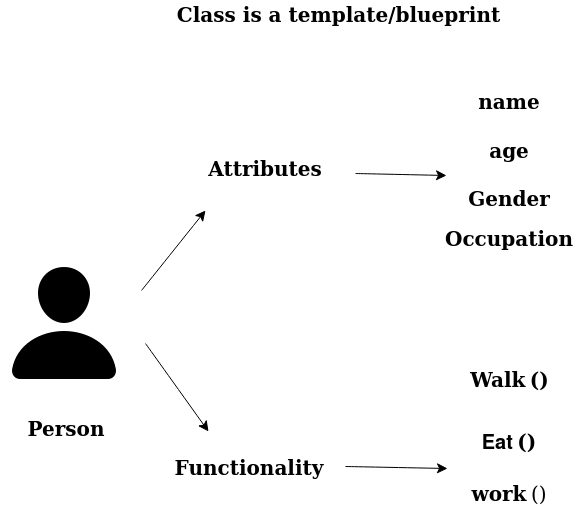





In [110]:
class Value:

  def __init__(self, data,_children=(),_op='',label=''):
    self.data = data
    self.grad = 0.0             # initially we assume gradient is 0 ie changing the var will not effect output.
    self._prev = set(_children)
    self._op = _op
    self.label = label
  def __repr__(self):
    return f"Value(data = {self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data ,(self,other),'+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data ,(self,other),'*')
    return out


a = Value(2.0 , label='a')
b = Value(-3.0, label='b')
c = Value(10.0 , label = 'c')
e = a*b ; e.label = 'e'
d= e +c ; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d * f; L.label = 'L'
L

Value(data = -8.0)

In [111]:
L._op

'*'

In [112]:
! pip install graphviz
from graphviz import Digraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
def trace(root):
  nodes, edges = set(), set()
  def build(v):
      if v not in nodes:
          nodes.add(v)
          for child in v._prev:
              edges.add((child, v))
              build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid , label = "{ %s | data %.4f | grad %.4f }" % (n.label,n.data,n.grad), shape='record')
        if n._op:
              dot.node(name = uid + n._op ,label=n._op)
              dot.edge(uid + n._op, uid)


    for n1, n2 in edges:
            dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

-  rectangle shape is for value objects.

- oval shape is for operations.which were applied on val .



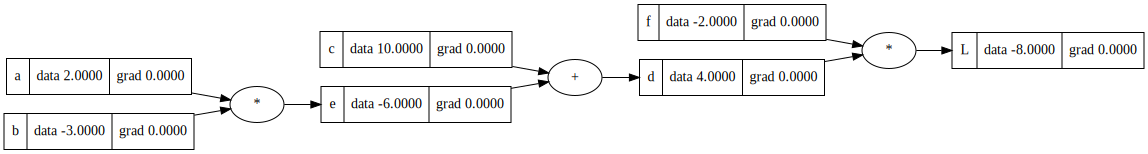

In [114]:
draw_dot(L)

- We build a mathematical expression .
- now we will calculate gradient using backward propogation.


In [115]:

def back_prop():

  h = 0.0001

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data


  print (((L2 +h ) - L1)/h)

back_prop()


0.9999999999976694


In [116]:
L.grad= 1.0

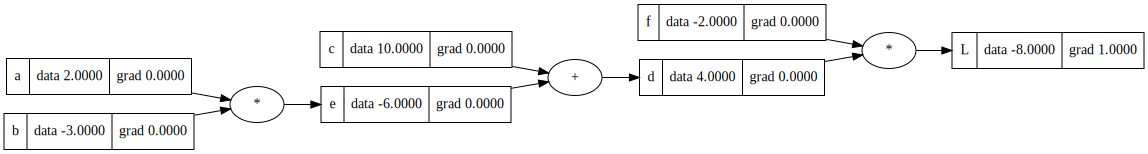

In [117]:
draw_dot(L)

- we will use def of derivative to verify gradient .
- derivative of l wrt d is calculated below .


In [118]:
def back_prop():

  h = 0.0001

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  d.data += h
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data


  print (((L2 ) - L1)/h)

back_prop()


-1.9999999999953388


- Now we will calulate  derivative of L wrt f.

In [119]:
def back_prop():

  h = 0.0001

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  f.data += h
  L = d * f; L.label = 'L'
  L2 = L.data


  print (((L2 ) - L1)/h)

back_prop()


3.9999999999995595


In [120]:
# derivative calculated above .
d.grad = -2.0
f.grad =  4.0

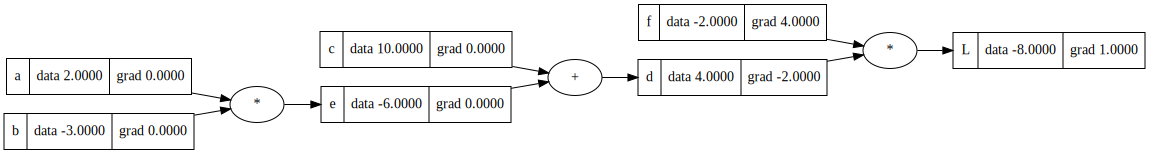

In [121]:
draw_dot(L)

### IMPORTANT
- chain rule
- https://en.wikipedia.org/wiki/Chain_rule

In [122]:
def back_prop():

  h = 0.0001

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  c.data += h
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data


  print (((L2 ) - L1)/h)

back_prop()



-1.9999999999953388


In [123]:
def back_prop():

  h = 0.0001

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  e.data += h
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data


  print (((L2 ) - L1)/h)

back_prop()

-1.9999999999953388


In [124]:
e.grad = -2.0
c.grad = -2.0

In [125]:
def back_prop():

  h = 0.0001

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0 , label='a')
  a.data += h
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data


  print (((L2 ) - L1)/h)

back_prop()

6.000000000021544


In [126]:
def back_prop():

  h = 0.0001

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data


  print (((L2 ) - L1)/h)

back_prop()

-4.000000000008441


In [127]:
a.grad = 6
b.grad = -4

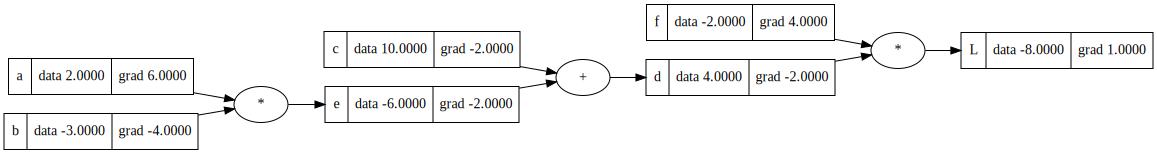

In [128]:
draw_dot(L)

### Backward propogation through neuron
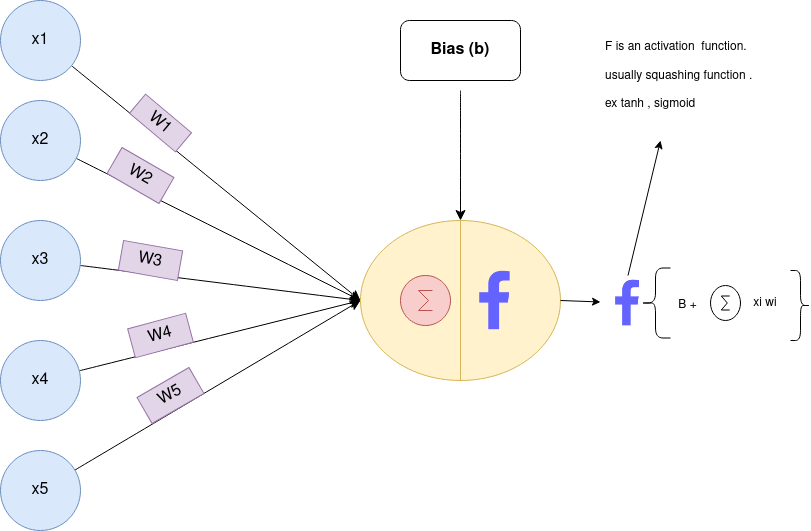


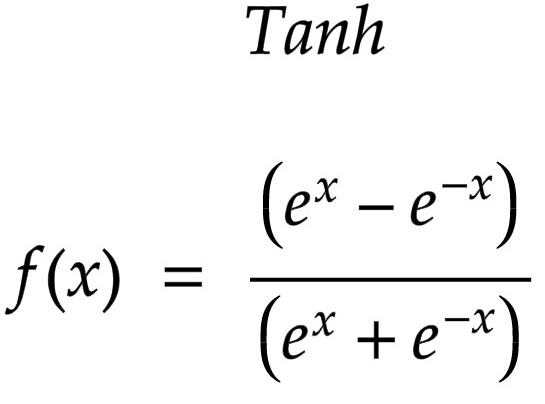


### tanh graph below

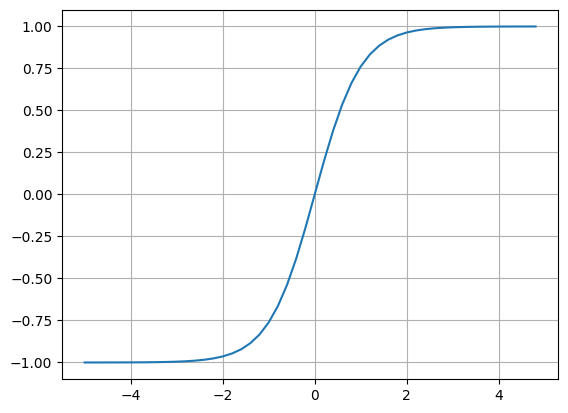

In [129]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [130]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'


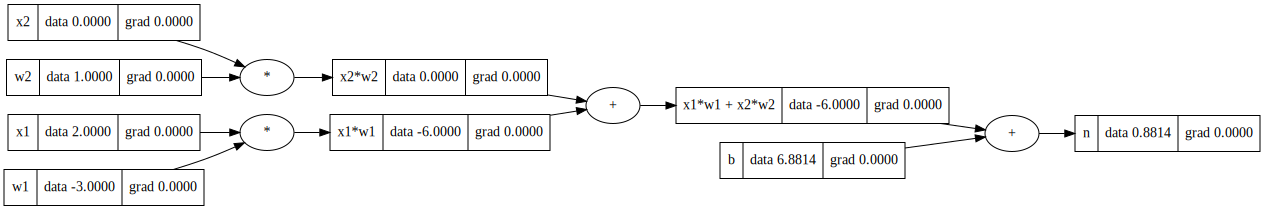

In [131]:
draw_dot(n)

In [132]:
class Value:

  def __init__(self, data,_children=(),_op='',label=''):
    self.data = data
    self.grad = 0.0             # initially we assume gradient is 0 ie changing the var will not effect output.
    self._prev = set(_children)
    self._op = _op
    self.label = label
  def __repr__(self):
    return f"Value(data = {self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data ,(self,other),'+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data ,(self,other),'*')
    return out


  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    return out

In [133]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label='o'

 - Now we have a tanh (activation / squashing function)

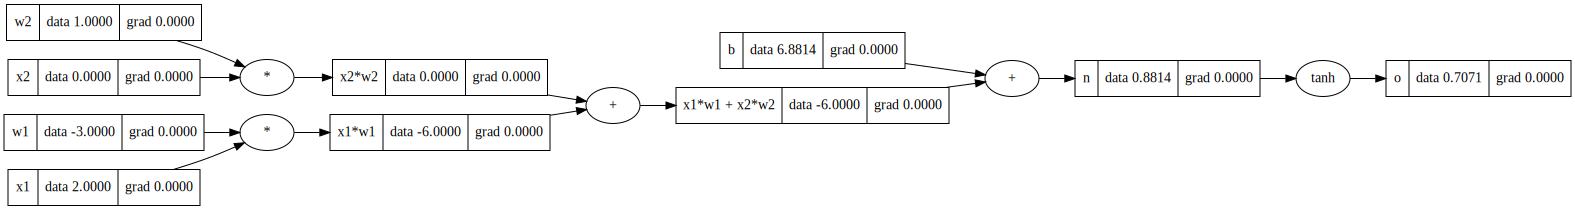

In [134]:
draw_dot(o)

- now backward porpogation manual through neuron


In [135]:
# o = tanh()
# do/dn = 1-o**2  by def
1- o.data**2

0.4999999999999999

In [136]:
n.grad =0.5
o.grad = 1.0

In [137]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [138]:
x1w1.grad =0.5
x2w2.grad =0.5


In [139]:
x2.grad = w2.data * x2w2.grad

w2.grad = x2.data * x2w2.grad

In [140]:
x1.grad = w1.data * x1w1.grad

w1.grad = x1.data * x1w1.grad

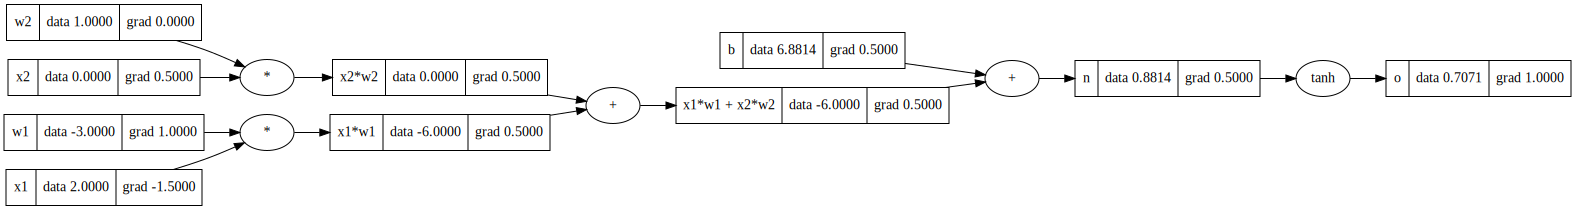

In [141]:
draw_dot(o)

### implimenting backward function for each operation


adding backward funation in micrograd

In [142]:
class Value:

  def __init__(self, data,_children=(),_op='',label=''):
    self.data = data
    self.grad = 0.0            # initially we assume gradient is 0 ie changing the var will not effect output.
    self._backward = lambda: None     # by default it does noting
    self._prev = set(_children)
    self._op = _op
    self.label = label
  def __repr__(self):
    return f"Value(data = {self.data})"


  def __add__(self, other):
    out = Value(self.data + other.data ,(self,other),'+')

    def _backward():
      self.grad = 1.0 * out.grad
      other.grad = 1.0 * out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data ,(self,other),'*')

    def _backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad
    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')


    def _backward():
      self.grad = (1 - t**2) * out.grad
    out._backward = _backward



    return out

In [143]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label='o'

 redefined all variables and all grad are set to zero

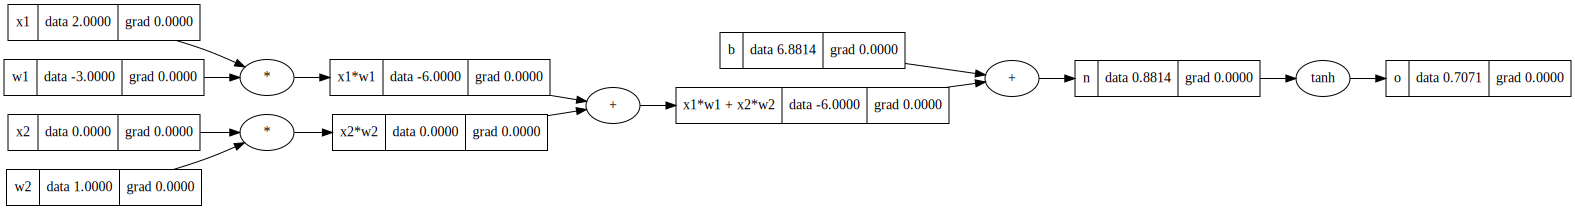

In [144]:
draw_dot(o)

In [145]:
o.grad = 1.0


In [146]:
o._backward()

In [147]:
n._backward()

In [148]:
b._backward()

In [149]:
x1w1x2w2._backward()

In [150]:
x2w2._backward()

x1w1._backward()

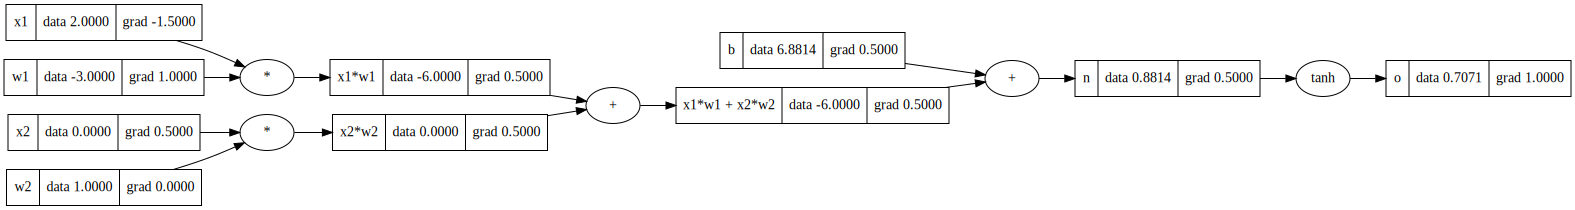

In [151]:
draw_dot(o)

- **Now we will implement the backward function on whole expression**

- **Topological sort**

1. create an empty list topo
2. create an empty set named visited.
3. defined a functio build_topo(which takes a vertex v as input. )
4. if current v is not visited (not in visited set ) mark it as visited.
5.

In [152]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label='o'

In [153]:
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo



[Value(data = 6.881373587019543),
 Value(data = 2.0),
 Value(data = -3.0),
 Value(data = -6.0),
 Value(data = 1.0),
 Value(data = 0.0),
 Value(data = 0.0),
 Value(data = -6.0),
 Value(data = 0.8813735870195432),
 Value(data = 0.7071067811865476)]

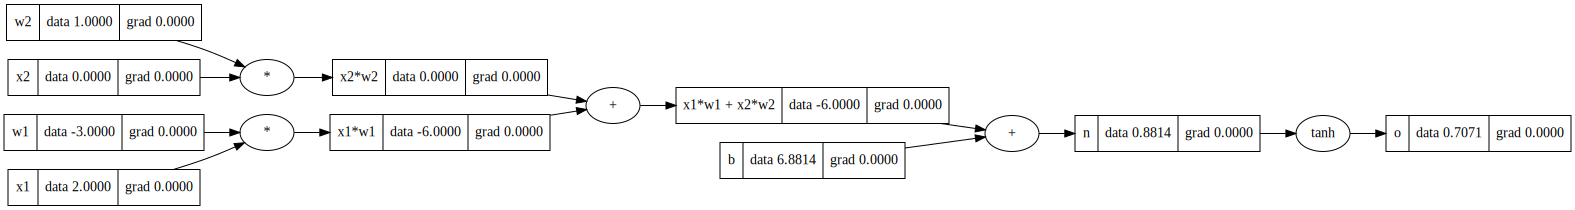

In [154]:
draw_dot(o)

In [155]:
o.grad = 1.0
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

for node in reversed(topo):
  node._backward()

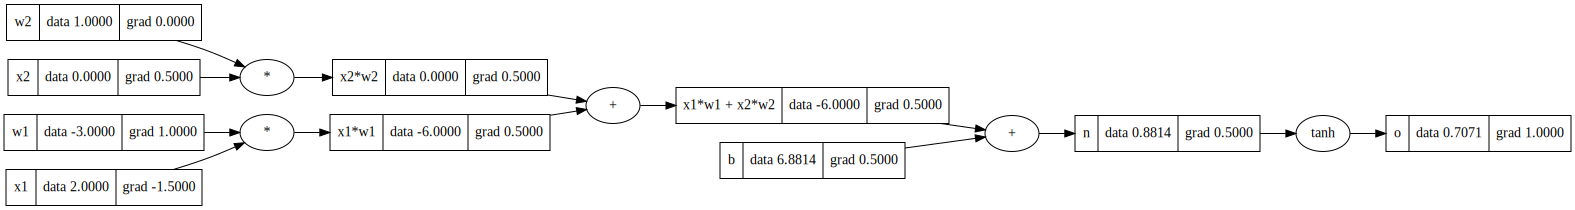

In [156]:
draw_dot(o)

### Now lets add backwardfuntion to micrograd.


In [157]:
class Value:

  def __init__(self, data,_children=(),_op='',label=''):
    self.data = data
    self.grad = 0.0            # initially we assume gradient is 0 ie changing the var will not effect output.
    self._backward = lambda: None     # by default it does noting
    self._prev = set(_children)
    self._op = _op
    self.label = label
  def __repr__(self):
    return f"Value(data = {self.data})"


  def __add__(self, other):
    out = Value(self.data + other.data ,(self,other),'+')

    def _backward():
      self.grad = 1.0 * out.grad
      other.grad = 1.0 * out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data ,(self,other),'*')

    def _backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad
    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')


    def _backward():
      self.grad = (1 - t**2) * out.grad
    out._backward = _backward

    return out


  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

**lets check**

In [158]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label='o'

In [159]:
o.backward()

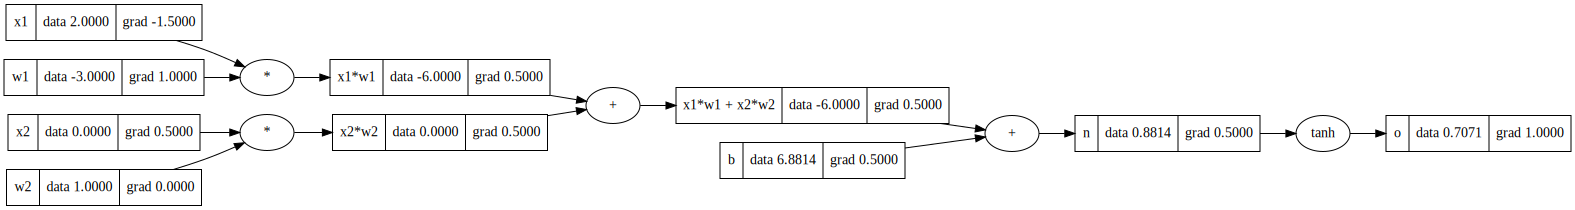

In [160]:
draw_dot(o)

### Fixing the bug


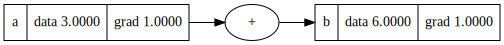

In [161]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)


- self and other are same so we are overwrighting the gradient .
- actual gradient should be 2

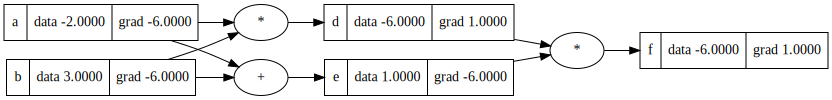

In [162]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

- This issue occurs when we use one variable more than once.

- **Lets redefine microdrad**

In [163]:
class Value:

  def __init__(self, data,_children=(),_op='',label=''):
    self.data = data
    self.grad = 0.0            # initially we assume gradient is 0 ie changing the var will not effect output.
    self._backward = lambda: None     # by default it does noting
    self._prev = set(_children)
    self._op = _op
    self.label = label
  def __repr__(self):
    return f"Value(data = {self.data})"


  def __add__(self, other):
    out = Value(self.data + other.data ,(self,other),'+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data ,(self,other),'*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')


    def _backward():
      self.grad = (1 - t**2) * out.grad
    out._backward = _backward

    return out


  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

- **Lets check if error is gone**

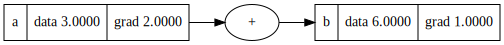

In [164]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

- **Breaking tanh and adding operations.**

-  added rmul , exp , divide , subtract , power ops

In [165]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out

  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward

    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


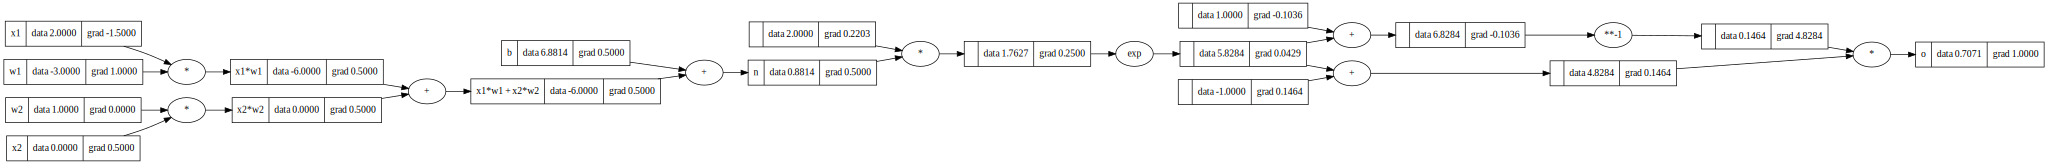

In [166]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'o'
o.backward()
draw_dot(o)

- **Doing same things in pytorch.**


- Default require_grad is false . ( for  efficiency reason)

In [167]:
import torch

x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())



0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


- **o.item , o.data will produce same result in pytorch.**


In [168]:
o.item()

0.7071066904050358

 ### **Multi layer perceptron**

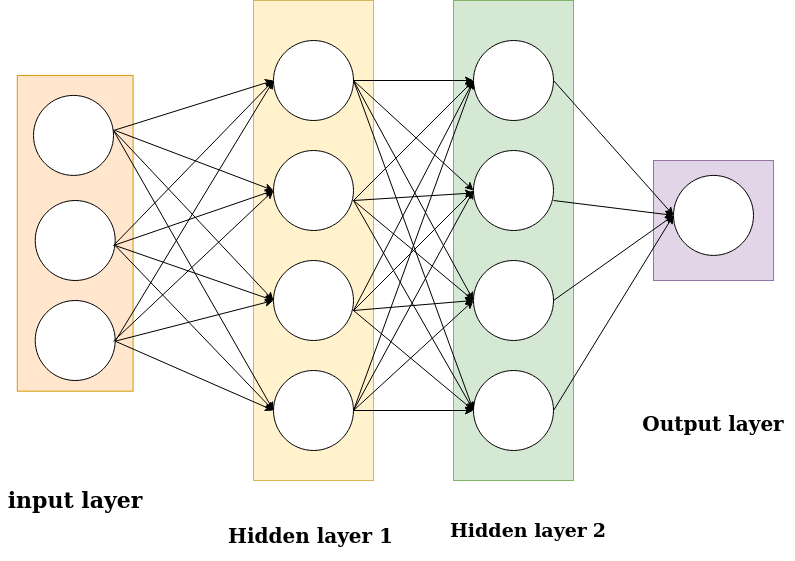

In [169]:
import random

- Define a class Neuron
- define constructor__init__ (self,nin) here nin represents number of
 inputs ( x1,x2,x3,x4).
- inside the constructor we define w  which is a list of random numbers ( lenth of list is given by nin)
- The use of _ as a throwaway variable is a convention . using _ as the loop variable in situations where the value is not needed

-  now we use __call__ method .
-  call method will multiply elemtnts of x and w  and then add b to it .After addition we pass this value through tanh function.
- Mlp has a 2 hidden layers .So we will define a layer
-

In [170]:
class Neuron:

  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out

  def parameters(self):
    return self.w + [self.b]

class Layer:

  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:

   def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

   def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

   def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]



In [171]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)


Value(data=-0.9508791782486482)

In [172]:

# example
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [173]:
ypred = [n(x)for x in xs]

In [174]:
ypred

[Value(data=-0.9508791782486482),
 Value(data=-0.9777705482812435),
 Value(data=-0.8429861210817386),
 Value(data=-0.7909602441215356)]

In [175]:
 loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))


In [176]:
loss

Value(data=7.038615670844667)

In [177]:
loss.backward()

In [178]:
n.layers[1].neurons[1].w[0].grad

-0.04741441060399745

- **the gradient is negative so if we increase the weight the loss will go down.**

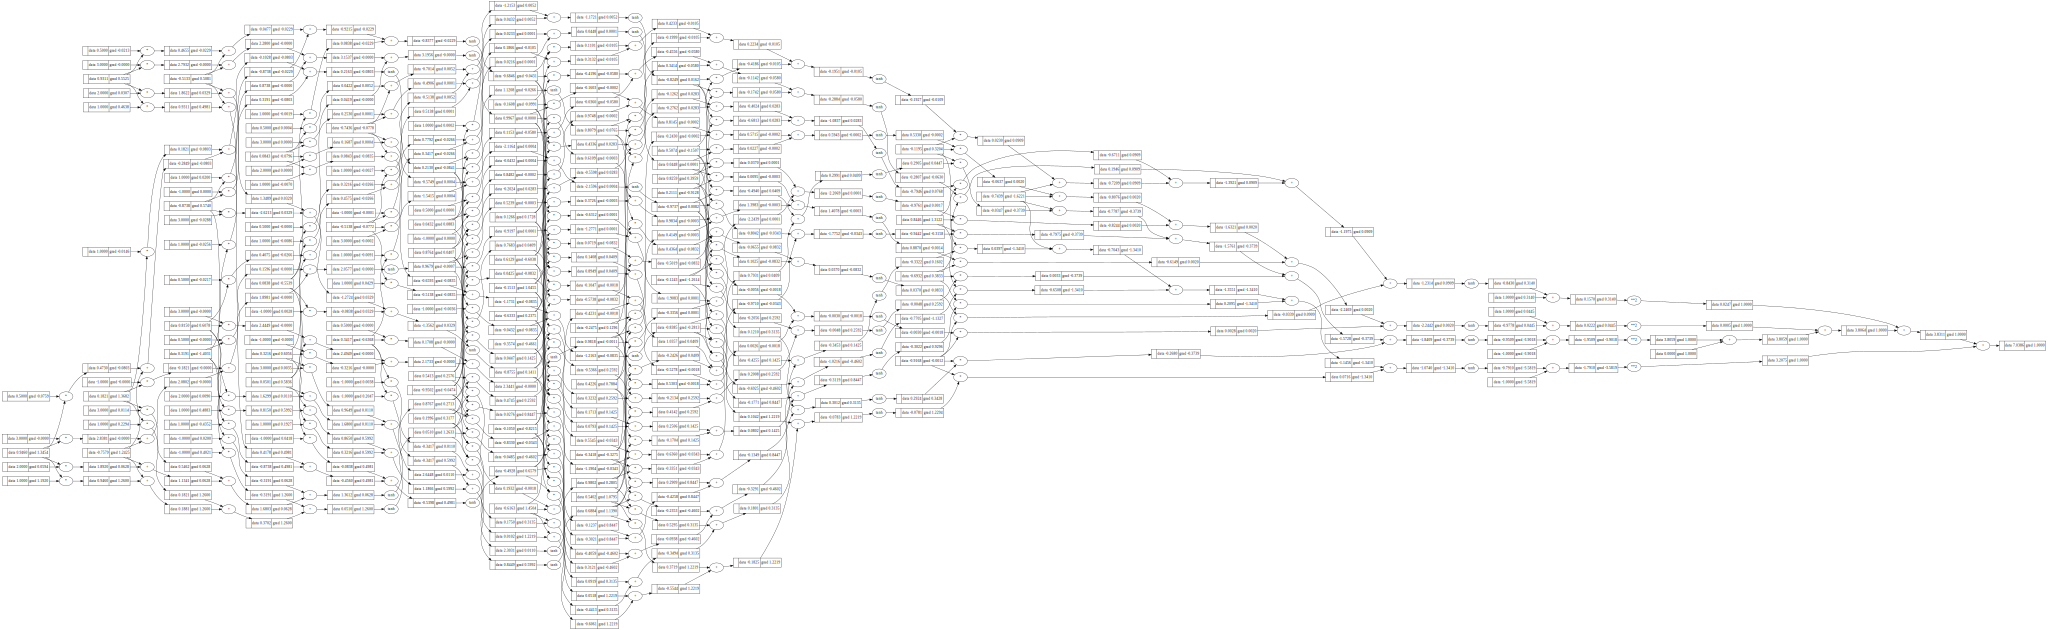

In [179]:
draw_dot(loss)

In [180]:
for p in n.parameters():
    p.data += -0.01 * p.grad


In [181]:
 loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

In [182]:
loss

Value(data=7.038615670844667)

In [183]:
for p in n.parameters():
    p.data += -0.1 * p.grad

In [184]:

 loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
 loss

Value(data=7.038615670844667)